<a href="https://colab.research.google.com/github/nikithapotluri/DEPRESSION-ANXIETY-DETECTION/blob/main/Depression_Anxiety_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEPRESSION & ANXIETY DETECTION**

In [ ]:
#IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For encoding categorical data:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#For splitting dataset into training & testing sets
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
#IMPORT DATASET

In [ ]:
dataset = pd.read_csv('./drive/MyDrive/depression_anxiety_data.csv')

In [ ]:
dataset.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   779 non-null    object 
 8   depressiveness        780 non-null    object 
 9   suicidal              782 non-null    object 
 10  depression_diagnosis  782 non-null    object 
 11  depression_treatment  779 non-null    object 
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           777 non-null    object 
 15  anxiety_diagnosis     7

In [ ]:
dataset.columns

Index(['id', 'school_year', 'age', 'gender', 'bmi', 'who_bmi', 'phq_score',
       'depression_severity', 'depressiveness', 'suicidal',
       'depression_diagnosis', 'depression_treatment', 'gad_score',
       'anxiety_severity', 'anxiousness', 'anxiety_diagnosis',
       'anxiety_treatment', 'epworth_score', 'sleepiness'],
      dtype='object')

In [ ]:
dataset.describe()

,id,school_year,age,bmi,phq_score,gad_score,epworth_score
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,775.000000
mean,392.000000,2.277139,20.233716,23.420533,7.123883,6.810983,6.376774
std,226.176922,1.163633,1.767217,4.563630,4.426580,4.727352,3.996443
min,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,196.500000,1.000000,19.000000,20.989420,4.000000,3.000000,3.500000
50%,392.000000,2.000000,20.000000,23.140496,6.000000,6.000000,6.000000
75%,587.500000,3.000000,21.000000,25.519924,9.000000,9.000000,9.000000
max,783.000000,4.000000,31.000000,54.552668,24.000000,21.000000,32.000000


In [ ]:
dataset.isnull().sum()

,0
id,0
school_year,0
age,0
gender,0
bmi,0
who_bmi,0
phq_score,0
depression_severity,4
depressiveness,3
suicidal,1


In [ ]:
dataset.duplicated().sum()

0

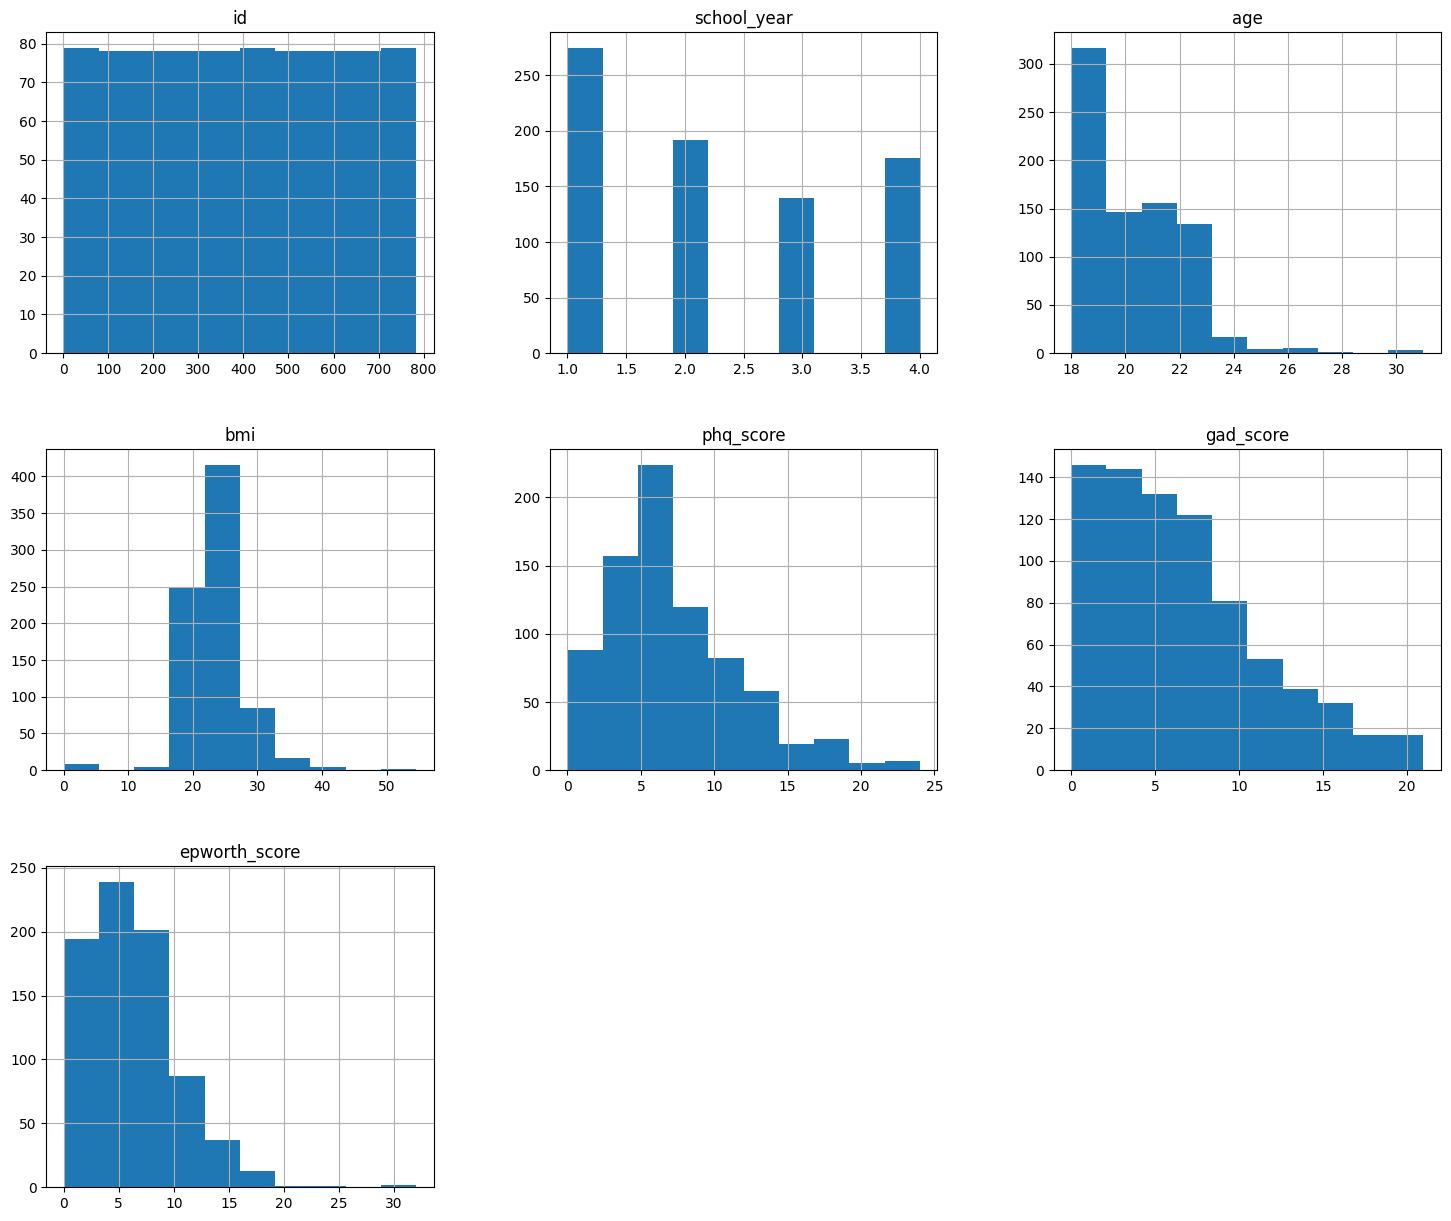

In [ ]:
dataset.hist(figsize=(18, 15))
plt.show()

In [ ]:
#NUMERICAL & CATEGORICAL COLUMNS

In [ ]:
numerical_columns = ['phq_score', 'gad_score', 'bmi', 'epworth_score', 'age']
categorical_columns = ['gender']

In [ ]:
#TARGET VARIABLES

In [ ]:
targets = ['depression_severity', 'anxiety_severity']

In [ ]:
#Display Independent & Dependent Values
print("Numerical Columns:")
print(numerical_columns)
print("\n")
print("Categorical Columns:")
print(categorical_columns)
print("\n")
print("Target Variables:")
print(targets)

Numerical Columns:
['phq_score', 'gad_score', 'bmi', 'epworth_score', 'age']


Categorical Columns:
['gender']


Target Variables:
['depression_severity', 'anxiety_severity']


In [ ]:
#HANDLE MISSING DATA

In [ ]:
# Fill numerical columns with mean
for col in numerical_columns:
    dataset[col] = dataset[col].fillna(dataset[col].mean())

# Fill categorical columns with mode
for col in categorical_columns:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

In [ ]:
#SEPARATE INDEPENDENT & DEPENDENT VARIABLES

In [ ]:
x = dataset[numerical_columns + categorical_columns]
y = dataset[targets]

# Display the separated variables
print("Independent Variables (x):")
print(x.head())
print("\n")
print("Dependent Variables (y):")
print(y.head())

Independent Variables (x):
   phq_score  gad_score        bmi  epworth_score  age  gender
0          9         11  33.333333            7.0   19    male
1          8          5  19.841270           14.0   18    male
2          8          6  25.102391            6.0   19    male
3         19         15  23.738662           11.0   18  female
4          6         14  25.617284            3.0   18    male


Dependent Variables (y):
  depression_severity anxiety_severity
0                Mild         Moderate
1                Mild             Mild
2                Mild             Mild
3   Moderately severe           Severe
4                Mild         Moderate


In [ ]:
#ENCODE CATEGORICAL DATA

In [ ]:
#Encode Independent Variables (Gender)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['gender'])  ], remainder='passthrough')
x_encoded = np.array(ct.fit_transform(x))

# Encode Dependent Variables (depression_severity, anxiety_severity)
y_encoded = y.copy()  # Create a copy to avoid warnings
le_depression = LabelEncoder()
y_encoded['depression_severity'] = le_depression.fit_transform(y_encoded['depression_severity'])

le_anxiety = LabelEncoder()
y_encoded['anxiety_severity'] = le_anxiety.fit_transform(y_encoded['anxiety_severity'])

In [ ]:
# Display the encoded variables
print("Encoded Independent Variables (x):")
print(x_encoded[:5])
print("\nEncoded Dependent Variables (y):")
print(y_encoded.head())

Encoded Independent Variables (x):
[[ 0.          1.          9.         11.         33.33333333  7.
  19.        ]
 [ 0.          1.          8.          5.         19.84126984 14.
  18.        ]
 [ 0.          1.          8.          6.         25.10239133  6.
  19.        ]
 [ 1.          0.         19.         15.         23.73866213 11.
  18.        ]
 [ 0.          1.          6.         14.         25.61728395  3.
  18.        ]]

Encoded Dependent Variables (y):
   depression_severity  anxiety_severity
0                    0                 2
1                    0                 1
2                    0                 1
3                    2                 4
4                    0                 2


In [ ]:
#SPLITTING DATASET INTO TRAINING & TESTING SETS

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_encoded, test_size = 0.2, random_state = 1)

In [ ]:
#Display training sets
print("x_train:")
print(x_train[:5])
print("\ny_train:")
print(y_train.head())
print("\nx_test:")
print(x_test[:5])
print("\ny_test:")
print(y_test.head())

x_train:
[[ 1.          0.          7.         11.         19.84126984  9.
  21.        ]
 [ 1.          0.          5.          7.         15.97881665  6.
  21.        ]
 [ 1.          0.          1.          2.         18.96192742  5.
  22.        ]
 [ 1.          0.         23.         13.         20.2020202  14.
  20.        ]
 [ 0.          1.          5.          2.         23.12406059  2.
  19.        ]]

y_train:
     depression_severity  anxiety_severity
610                    0                 2
578                    0                 1
528                    3                 3
341                    4                 2
352                    0                 3

x_test:
[[ 0.          1.          5.          4.         23.14814815  0.
  22.        ]
 [ 0.          1.         17.         14.         25.71219869 14.
  21.        ]
 [ 0.          1.          3.          4.         24.48979592  6.
  18.        ]
 [ 1.          0.         10.         10.         20.07733492 14.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Initialize Logistic Regression models with random_state and max_iter
model_depression = LogisticRegression(random_state=1, max_iter=1000)
model_anxiety = LogisticRegression(random_state=1, max_iter=1000)

In [ ]:
# 2. Train the models with training data
model_depression.fit(x_train, y_train['depression_severity'])
model_anxiety.fit(x_train, y_train['anxiety_severity'])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(max_iter=1000, random_state=1)

In [ ]:
# 3. Make predictions using the test data
y_pred_depression = model_depression.predict(x_test)
y_pred_anxiety = model_anxiety.predict(x_test)

In [ ]:
# 4. Evaluate the models (Accuracy, Precision, Recall, F1-Score)
accuracy_depression = accuracy_score(y_test['depression_severity'], y_pred_depression)
accuracy_anxiety = accuracy_score(y_test['anxiety_severity'], y_pred_anxiety)

In [ ]:
# Use zero_division=1 to handle the undefined precision issue
precision_depression = precision_score(y_test['depression_severity'], y_pred_depression, average='weighted', zero_division=1)
precision_anxiety = precision_score(y_test['anxiety_severity'], y_pred_anxiety, average='weighted', zero_division=1)

In [ ]:
recall_depression = recall_score(y_test['depression_severity'], y_pred_depression, average='weighted', zero_division=1)
recall_anxiety = recall_score(y_test['anxiety_severity'], y_pred_anxiety, average='weighted', zero_division=1)

In [ ]:
f1_depression = f1_score(y_test['depression_severity'], y_pred_depression, average='weighted', zero_division=1)
f1_anxiety = f1_score(y_test['anxiety_severity'], y_pred_anxiety, average='weighted', zero_division=1)

In [ ]:
# Print out the scores
print("Depression Model Evaluation:")
print(f"Accuracy: {accuracy_depression * 100:.2f}%")
print(f"Precision: {precision_depression:.2f}")
print(f"Recall: {recall_depression:.2f}")
print(f"F1 Score: {f1_depression:.2f}")

Depression Model Evaluation:
Accuracy: 96.18%
Precision: 0.98
Recall: 0.96
F1 Score: 0.96


In [ ]:
print("Anxiety Model Evaluation:")
print(f"Accuracy: {accuracy_anxiety * 100:.2f}%")
print(f"Precision: {precision_anxiety:.2f}")
print(f"Recall: {recall_anxiety:.2f}")
print(f"F1 Score: {f1_anxiety:.2f}")

Anxiety Model Evaluation:
Accuracy: 96.82%
Precision: 0.96
Recall: 0.97
F1 Score: 0.97


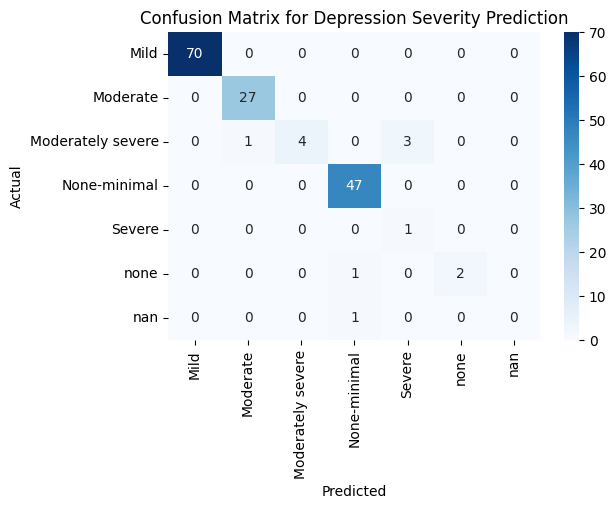

In [ ]:
# 5. Display confusion matrix for depression
cm_depression = confusion_matrix(y_test['depression_severity'], y_pred_depression)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_depression, annot=True, fmt='d', cmap='Blues', xticklabels=le_depression.classes_, yticklabels=le_depression.classes_)
plt.title('Confusion Matrix for Depression Severity Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

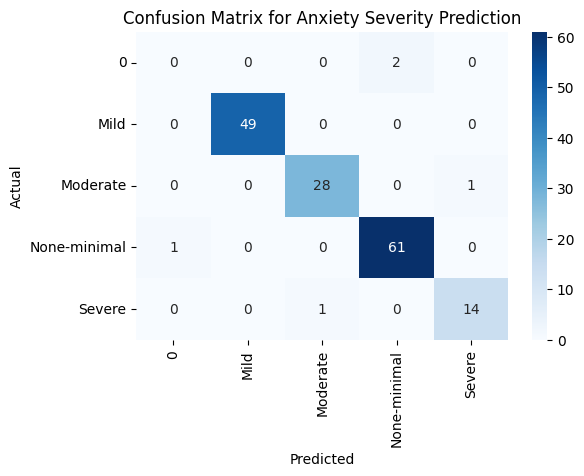

In [ ]:
# 6. Display confusion matrix for anxiety
cm_anxiety = confusion_matrix(y_test['anxiety_severity'], y_pred_anxiety)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_anxiety, annot=True, fmt='d', cmap='Blues', xticklabels=le_anxiety.classes_, yticklabels=le_anxiety.classes_)
plt.title('Confusion Matrix for Anxiety Severity Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# 7. Accuracy Comparison Bar Plot
accuracies = [accuracy_depression * 100, accuracy_anxiety * 100]
precisions = [precision_depression * 100, precision_anxiety * 100]
recalls = [recall_depression * 100, recall_anxiety * 100]
f1_scores = [f1_depression * 100, f1_anxiety * 100]
models = ['Depression Severity', 'Anxiety Severity']

In [ ]:
# Create a DataFrame for visualization
score_data = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

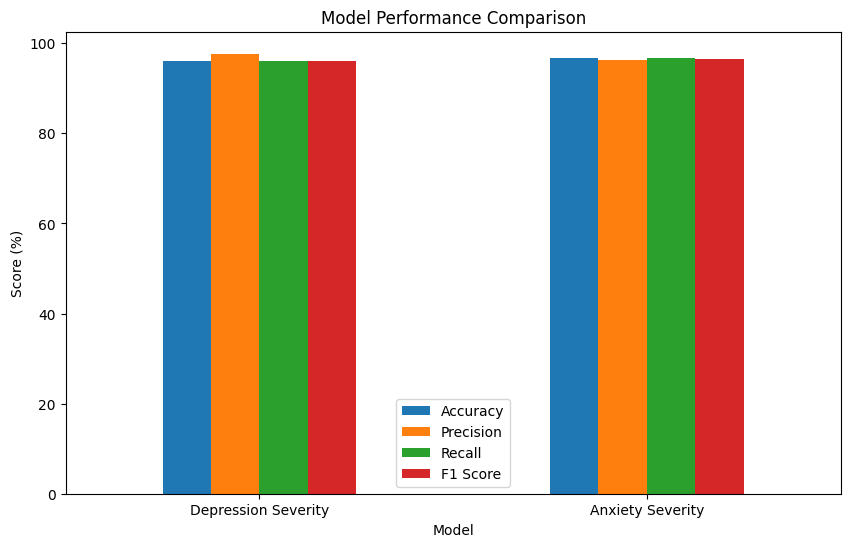

In [ ]:
# Plot the metrics
score_data.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score (%)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Optionally, print classification reports for detailed metrics
print("\nDepression Model Classification Report:")
print(classification_report(y_test['depression_severity'], y_pred_depression, zero_division=1))

print("\nAnxiety Model Classification Report:")
print(classification_report(y_test['anxiety_severity'], y_pred_anxiety, zero_division=1))


Depression Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       0.96      1.00      0.98        27
           2       1.00      0.50      0.67         8
           3       0.96      1.00      0.98        47
           4       0.25      1.00      0.40         1
           5       1.00      0.67      0.80         3
           6       1.00      0.00      0.00         1

    accuracy                           0.96       157
   macro avg       0.88      0.74      0.69       157
weighted avg       0.98      0.96      0.96       157


Anxiety Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        49
           2       0.97      0.97      0.97        29
           3       0.97      0.98      0.98        62
           4       0.93      0.93      0.93        15

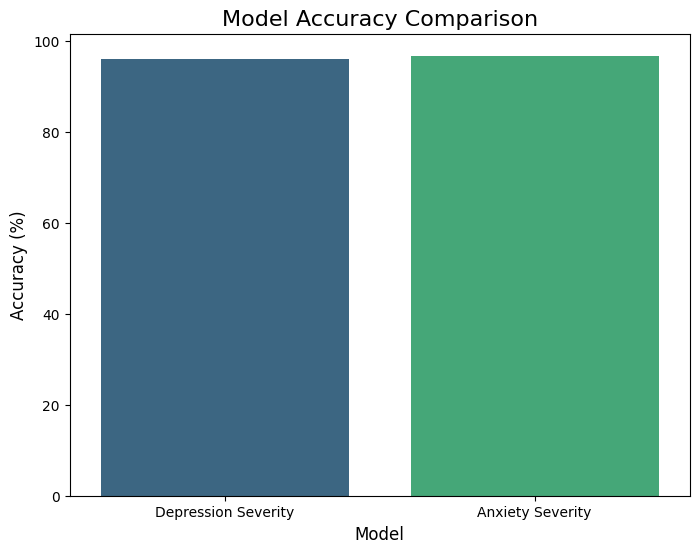

In [ ]:
# Create the bar plot with `hue` as `x` to avoid the warning
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy (%)', data=pd.DataFrame({
    'Model': models, 'Accuracy (%)': accuracies
}), palette='viridis', hue='Model', legend=False)

# Add title and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Show the plot
plt.show()

In [ ]:
import numpy as np

# Function to predict depression and anxiety severity

def predict_severity():
    print("\nEnter the following details to check for\n Depression and Anxiety Severity:\n")
    gender = input("Gender (male/female): ").strip().lower()
    phq_score = float(input("PHQ Score: "))
    gad_score = float(input("GAD Score: "))
    bmi = float(input("BMI: "))
    epworth_score = float(input("Epworth Score: "))
    age = int(input("Age: "))

    # Encode gender as done before (OneHotEncoder)
    gender_encoded = [1, 0] if gender == "female" else [0, 1]  # [Female, Male]

    # Create input array
    user_data = np.array([gender_encoded + [phq_score, gad_score, bmi, epworth_score, age]])

    # Make predictions
    depression_prediction = model_depression.predict(user_data)[0]
    anxiety_prediction = model_anxiety.predict(user_data)[0]

    # Convert back to labels
    depression_label = le_depression.inverse_transform([depression_prediction])[0]
    anxiety_label = le_anxiety.inverse_transform([anxiety_prediction])[0]

    # Determine Yes/No severity
    depression_result = "Yes" if depression_label.lower() in ["moderate", "moderately severe", "severe"] else "No"
    anxiety_result = "Yes" if anxiety_label.lower() in ["moderate", "severe"] else "No"

    print("\nResults:")
    print(f"Depression Severity: {depression_result}")
    print(f"Anxiety Severity: {anxiety_result}")

# Call function to take input and predict
predict_severity()



Enter the following details to check for
 Depression and Anxiety Severity:

Gender (male/female): 


KeyboardInterrupt: Interrupted by user

**SVM**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train SVM model for depression
svm_depression = SVC(kernel='linear', random_state=42)
svm_depression.fit(x_train, y_train['depression_severity'])

# Train SVM model for anxiety
svm_anxiety = SVC(kernel='linear', random_state=42)
svm_anxiety.fit(x_train, y_train['anxiety_severity'])

# Predictions
y_pred_depression = svm_depression.predict(x_test)
y_pred_anxiety = svm_anxiety.predict(x_test)


In [ ]:
# Evaluation
print("Depression Model Performance:")
print(classification_report(y_test['depression_severity'], y_pred_depression))
print("Accuracy:", accuracy_score(y_test['depression_severity'], y_pred_depression))

print("\nAnxiety Model Performance:")
print(classification_report(y_test['anxiety_severity'], y_pred_anxiety))
print("Accuracy:", accuracy_score(y_test['anxiety_severity'], y_pred_anxiety))

Depression Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       0.96      1.00      0.98        27
           2       1.00      0.75      0.86         8
           3       0.94      1.00      0.97        47
           4       0.50      1.00      0.67         1
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         1

    accuracy                           0.97       157
   macro avg       0.77      0.73      0.71       157
weighted avg       0.97      0.97      0.96       157

Accuracy: 0.9681528662420382

Anxiety Model Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        49
           2       0.97      0.97      0.97        29
           3       0.97      0.98      0.98        62
           4       0.93      0.93      0.93  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


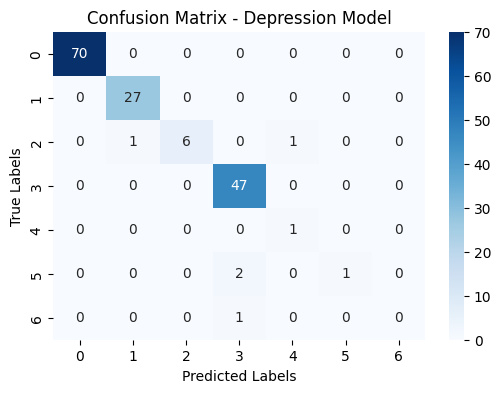

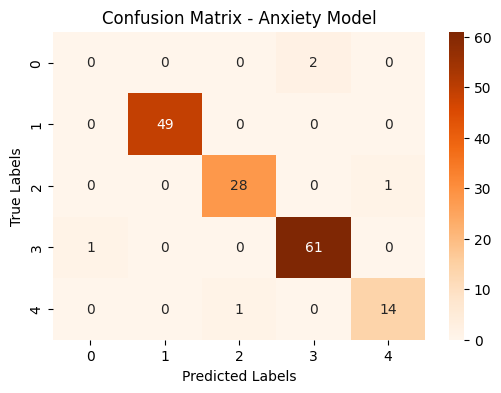

In [ ]:
# Confusion Matrix for Depression
cm_depression = confusion_matrix(y_test['depression_severity'], y_pred_depression)
plt.figure(figsize=(6,4))
sns.heatmap(cm_depression, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Depression Model')
plt.show()

# Confusion Matrix for Anxiety
cm_anxiety = confusion_matrix(y_test['anxiety_severity'], y_pred_anxiety)
plt.figure(figsize=(6,4))
sns.heatmap(cm_anxiety, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Anxiety Model')
plt.show()

**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize Naïve Bayes models for both depression and anxiety
nb_depression = GaussianNB()
nb_anxiety = GaussianNB()

# Train models
nb_depression.fit(x_train, y_train['depression_severity'])
nb_anxiety.fit(x_train, y_train['anxiety_severity'])

# Make predictions
y_pred_depression = nb_depression.predict(x_test)
y_pred_anxiety = nb_anxiety.predict(x_test)

# Evaluate models
accuracy_depression = accuracy_score(y_test['depression_severity'], y_pred_depression)
accuracy_anxiety = accuracy_score(y_test['anxiety_severity'], y_pred_anxiety)

print("Depression Model Performance:")
print(classification_report(y_test['depression_severity'], y_pred_depression))
print("Accuracy:", accuracy_score(y_test['depression_severity'], y_pred_depression))

print("\nAnxiety Model Performance:")
print(classification_report(y_test['anxiety_severity'], y_pred_anxiety))
print("Accuracy:", accuracy_score(y_test['anxiety_severity'], y_pred_anxiety))

Depression Model Accuracy: 0.97
Anxiety Model Accuracy: 0.90
Depression Model Performance:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       1.00      0.96      0.98        27
           2       1.00      0.88      0.93         8
           3       0.94      1.00      0.97        47
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1

    accuracy                           0.97       157
   macro avg       0.92      0.97      0.93       157
weighted avg       0.97      0.97      0.97       157

Accuracy: 0.9681528662420382

Anxiety Model Performance:
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.88      0.92      0.90        49
           2       0.96      0.90      0.93        29
           3       0.92      0.89     

**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize Decision Tree models for both depression and anxiety
dt_depression = DecisionTreeClassifier(random_state=1)
dt_anxiety = DecisionTreeClassifier(random_state=1)

# Train models
dt_depression.fit(x_train, y_train['depression_severity'])
dt_anxiety.fit(x_train, y_train['anxiety_severity'])

# Make predictions
y_pred_depression = dt_depression.predict(x_test)
y_pred_anxiety = dt_anxiety.predict(x_test)

# Evaluate models
accuracy_depression = accuracy_score(y_test['depression_severity'], y_pred_depression)
accuracy_anxiety = accuracy_score(y_test['anxiety_severity'], y_pred_anxiety)

print("Depression Model Performance:")
print(classification_report(y_test['depression_severity'], y_pred_depression))
print("Accuracy:", accuracy_score(y_test['depression_severity'], y_pred_depression))

print("\nAnxiety Model Performance:")
print(classification_report(y_test['anxiety_severity'], y_pred_anxiety))
print("Accuracy:", accuracy_score(y_test['anxiety_severity'], y_pred_anxiety))


Depression Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1

    accuracy                           1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157

Accuracy: 1.0

Anxiety Model Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        29
           3       0.97      0.92      0.94        62
           4       1.00      1.00      1.00        15

    a

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest models for both depression and anxiety
rf_depression = RandomForestClassifier(n_estimators=100, random_state=1)
rf_anxiety = RandomForestClassifier(n_estimators=100, random_state=1)

# Train models
rf_depression.fit(x_train, y_train['depression_severity'])
rf_anxiety.fit(x_train, y_train['anxiety_severity'])

# Make predictions
y_pred_depression = rf_depression.predict(x_test)
y_pred_anxiety = rf_anxiety.predict(x_test)

# Evaluate models
accuracy_depression = accuracy_score(y_test['depression_severity'], y_pred_depression)
accuracy_anxiety = accuracy_score(y_test['anxiety_severity'], y_pred_anxiety)

print("Depression Model Performance:")
print(classification_report(y_test['depression_severity'], y_pred_depression))
print("Accuracy:", accuracy_score(y_test['depression_severity'], y_pred_depression))

print("\nAnxiety Model Performance:")
print(classification_report(y_test['anxiety_severity'], y_pred_anxiety))
print("Accuracy:", accuracy_score(y_test['anxiety_severity'], y_pred_anxiety))


Depression Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       0.96      1.00      0.98        27
           2       1.00      1.00      1.00         8
           3       0.98      1.00      0.99        47
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.99       157
   macro avg       0.71      0.71      0.71       157
weighted avg       0.97      0.99      0.98       157

Accuracy: 0.9872611464968153

Anxiety Model Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        49
           2       0.97      1.00      0.98        29
           3       0.97      1.00      0.98        62
           4       1.00      0.93      0.97  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN models for both depression and anxiety
knn_depression = KNeighborsClassifier(n_neighbors=5)
knn_anxiety = KNeighborsClassifier(n_neighbors=5)

# Train models
knn_depression.fit(x_train, y_train['depression_severity'])
knn_anxiety.fit(x_train, y_train['anxiety_severity'])

# Make predictions
y_pred_depression = knn_depression.predict(x_test)
y_pred_anxiety = knn_anxiety.predict(x_test)

# Evaluate models
accuracy_depression = accuracy_score(y_test['depression_severity'], y_pred_depression)
accuracy_anxiety = accuracy_score(y_test['anxiety_severity'], y_pred_anxiety)

print("Depression Model Performance:")
print(classification_report(y_test['depression_severity'], y_pred_depression))
print("Accuracy:", accuracy_score(y_test['depression_severity'], y_pred_depression))

print("\nAnxiety Model Performance:")
print(classification_report(y_test['anxiety_severity'], y_pred_anxiety))
print("Accuracy:", accuracy_score(y_test['anxiety_severity'], y_pred_anxiety))


Depression Model Performance:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        70
           1       0.81      0.63      0.71        27
           2       0.83      0.62      0.71         8
           3       0.77      0.77      0.77        47
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.76       157
   macro avg       0.45      0.42      0.43       157
weighted avg       0.74      0.76      0.75       157

Accuracy: 0.7643312101910829

Anxiety Model Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.64      0.71      0.67        49
           2       0.68      0.66      0.67        29
           3       0.80      0.84      0.82        62
           4       1.00      0.60      0.75  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Logistic Regression: 96.18 , 96.82

---

SVM : 96.81, 96.81

---
Naive Bayes: 96.8, 89.80

---

Decision Tree: 100, 95.5

---

Random Forest: 98.72, 98.08

---

KNN: 76.43, 73.24